# QTS Project Draft
## Time-series Momentum in Cryptocurrency Markets

Armand Dang, Angelo Pacheco, Brennan Stevens, Andrew Park

## Project Idea

<span style="color:red">

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum

</span>



## Data Pre-processing

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import datetime

from src.data_binance import download_data
from src.preprocess import pivot_close_price, plot_valid_tickers, filter_date

### Download data from Binance

In [2]:
start_date = '2015-01-01'
end_date = '2025-02-24'
interval='1d'
filepath = 'data/raw/'

raw_data = pl.from_pandas(download_data(start_date, end_date, interval, filepath=filepath))
raw_data.head(3)

master_crypto_data_2015-01-01_2025-02-24_1d.parquet loaded successfully.


Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Ticker
"datetime[ns, UTC]",str,str,str,str,str,str,str,str,str,str,str,str
2019-09-23 00:00:00 UTC,"""9930.13000000""","""9930.13000000""","""9930.13000000""","""9930.13000000""","""0.00100000""","""1569283199999""","""9.93013000""","""1""","""0.00000000""","""0.00000000""","""0""","""BTCUSDT"""
2019-09-24 00:00:00 UTC,"""9637.93000000""","""9665.05000000""","""7996.45000000""","""8519.67000000""","""202.35079900""","""1569369599999""","""1739432.08920509""","""2345""","""125.93546400""","""1075623.60280331""","""0""","""BTCUSDT"""
2019-09-25 00:00:00 UTC,"""8528.12000000""","""8724.77000000""","""8247.78000000""","""8435.28000000""","""55.41797100""","""1569455999999""","""469361.69055629""","""763""","""29.05942700""","""246049.20514584""","""0""","""BTCUSDT"""


### Data cleaning and processing

In [3]:
close_prices = pivot_close_price(raw_data)
tickers = close_prices.columns[1:]
close_prices.head(3)


date,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,BNBUSDT,ADAUSDT,BATUSDT,ETCUSDT,XLMUSDT,ZRXUSDT,DOGEUSDT,ATOMUSDT,NEOUSDT,VETUSDT,QTUMUSDT,ONTUSDT,KNCUSDT,VTHOUSDT,COMPUSDT,MKRUSDT,ONEUSDT,BANDUSDT,STORJUSDT,UNIUSDT,SOLUSDT,EGLDUSDT,PAXGUSDT,OXTUSDT,ZENUSDT,FILUSDT,AAVEUSDT,GRTUSDT,SHIBUSDT,CRVUSDT,AXSUSDT,…,PROMUSDT,DIAUSDT,LOOMUSDT,STMXUSDT,POLYXUSDT,IOSTUSDT,ARBUSDT,FLOKIUSDT,XECUSDT,BLURUSDT,ANKRUSDT,DAIUSDT,DASHUSDT,HBARUSDT,ICXUSDT,IOTAUSDT,RVNUSDT,XNOUSDT,XTZUSDT,ZILUSDT,ORBSUSDT,ADXUSDT,FORTUSDT,SUIUSDT,ONGUSDT,GUSDT,RENDERUSDT,BONKUSDT,MAGICUSDT,PEPEUSDT,WIFUSDT,IOTXUSDT,PNUTUSDT,PENGUUSDT,POLUSDT,TRUMPUSDT,NEIROUSDT
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2019-09-23,9930.13,209.55,0.27311,306.91,73.58,19.8787,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2019-09-24,8519.67,167.09,0.23264,221.2,57.67,15.8755,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2019-09-25,8435.28,170.0,0.24603,226.25,57.5,16.0652,0.039,0.1633,4.9138,0.05727,0.2102,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


#### Number of available data
Since some of the close price does not start as of the starting date, let us understand how the number of available tickers grows with time.

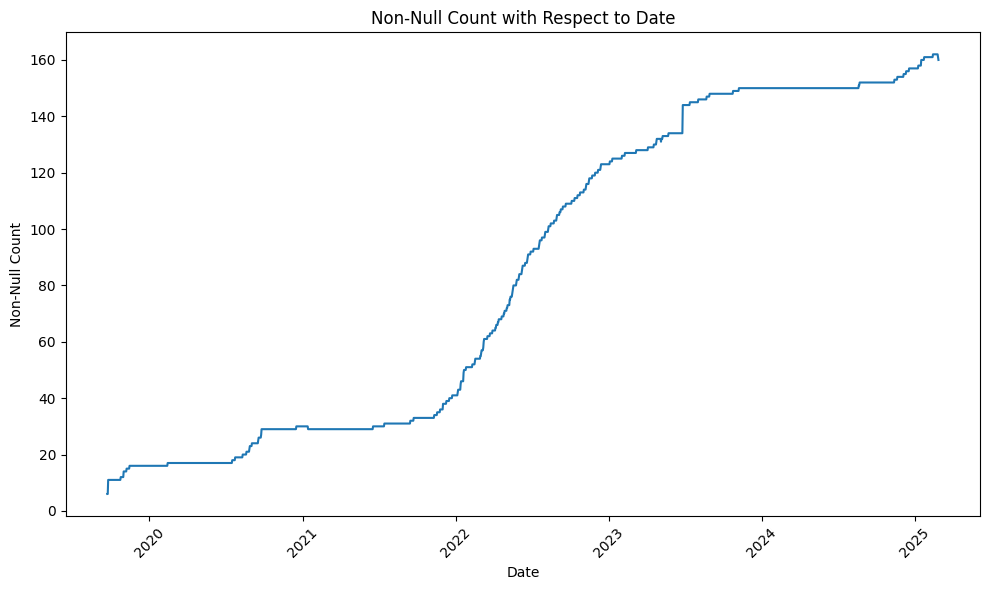

In [4]:
close_prices_analysis = plot_valid_tickers(close_prices)

In [5]:
close_prices_analysis.filter(pl.col('pct_change') != 0)[['date', 'pct_change', 'non_null_count']].drop_nulls().sort('date', descending=False).head(10)

date,pct_change,non_null_count
date,f64,i64
2019-09-25,0.833333,11
2019-10-25,0.090909,12
2019-11-01,0.166667,14
2019-11-08,0.071429,15
2019-11-15,0.066667,16
2020-02-14,0.0625,17
2020-07-17,0.058824,18
2020-07-24,0.055556,19
2020-08-11,0.052632,20


Given the data, a decent choice to choose the starting date of our analysis would be from __2019-09-25__, so that 11 tickers can be captured.

However, by reducing the sample size by about 2 months, 16 tickers can be included if starting date is taken to be __2019-11-15__.

For our study, we will be using the starting date of __2019-11-15__, which will give us a universe of 16 cryptocurrencies to trade.

#### Filtering for the relevant universe


In [7]:
start_date = '2019-11-15'
close_prices = filter_date(close_prices, start_date)
close_prices.head(3)

date,BTCUSDT,ETHUSDT,BCHUSDT,LTCUSDT,BNBUSDT,ADAUSDT,BATUSDT,ETCUSDT,XLMUSDT,ZRXUSDT,DOGEUSDT,ATOMUSDT,NEOUSDT,VETUSDT,QTUMUSDT
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2019-11-15,8473.65,180.09,263.67,57.6,20.2805,0.04426,0.2508,4.5604,0.07215,0.277,0.0026473,3.955,12.015,0.007863,2.156
2019-11-16,8495.01,182.36,265.07,58.24,20.1868,0.0439,0.2674,4.6324,0.0713,0.2817,0.0026638,3.961,12.394,0.007246,2.144
2019-11-17,8511.33,183.75,265.74,59.15,20.1318,0.04502,0.2729,4.6217,0.0716,0.2759,0.0026342,3.907,12.067,0.007656,2.154
